# Mechanical tool images using transfer learning in vgg16

## import library

In [1]:
import os
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [21]:
# re-size all the images to this
image_resize = [224, 224]

train = 'F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\properly_split_train\\train'
test = 'F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\properly_split_train\\test'

In [22]:

check  = os.listdir(train)
num_samples= len(check)
print(num_samples)

8


In [25]:
check

['Gasoline Can',
 'Hammer',
 'pebbel',
 'Pliers',
 'Rope',
 'Screw Driver',
 'Tool box',
 'Wrench']

In [26]:
check[3]

'Pliers'

## vgg16 model apply

In [3]:
vgg = VGG16(input_shape=image_resize + [3], weights='imagenet', include_top=False)


In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes and  * count all image
gloab_value_change = glob('F:/IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL/machine-tool-dataset/properly_split_train/train/*')

In [6]:
s = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(gloab_value_change), activation='softmax')(s)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\properly_split_train\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5005 images belonging to 8 classes.


In [12]:
test_set = test_datagen.flow_from_directory('F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\properly_split_train\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1256 images belonging to 8 classes.


In [13]:
# fit the model

p = model.fit(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set)
)

Epoch 1/5
157/157 [==============================] - 3266s 21s/step - loss: 1.0825 - accuracy: 0.6306 - val_loss: 0.7958 - val_accuracy: 0.7373
Epoch 2/5
157/157 [==============================] - 2935s 19s/step - loss: 0.6751 - accuracy: 0.7660 - val_loss: 0.7574 - val_accuracy: 0.7420
Epoch 3/5
157/157 [==============================] - 2940s 19s/step - loss: 0.4995 - accuracy: 0.8190 - val_loss: 0.7841 - val_accuracy: 0.7484
Epoch 4/5
157/157 [==============================] - 4210s 27s/step - loss: 0.4207 - accuracy: 0.8529 - val_loss: 0.8321 - val_accuracy: 0.7588
Epoch 5/5
157/157 [==============================] - 2727s 17s/step - loss: 0.4035 - accuracy: 0.8625 - val_loss: 0.7712 - val_accuracy: 0.7699


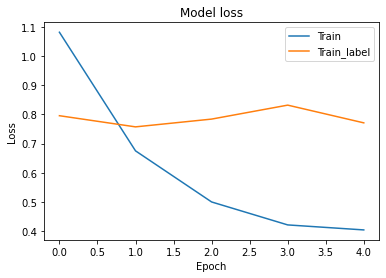

<Figure size 432x288 with 0 Axes>

In [14]:

# plot the loss
#Visualize the models loss
plt.plot(p.history['loss'])
plt.plot(p.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Train_label'], loc='upper right')
plt.show()
plt.savefig('LossVal_loss')



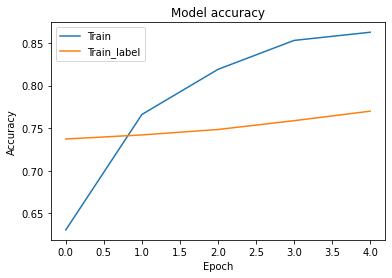

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the accuracy
plt.plot(p.history['accuracy'])
plt.plot(p.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Train_label'])
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h8 file
##import tensorflow as tf

#from keras.models import load_model

#model.save('model_vgg16_accuracy.h8')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_vgg16_accuracy.h8\assets


In [17]:
gloab_value_change

['F:/IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL/machine-tool-dataset/properly_split_train/train\\Gasoline Can',
 'F:/IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL/machine-tool-dataset/properly_split_train/train\\Hammer',
 'F:/IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL/machine-tool-dataset/properly_split_train/train\\pebbel',
 'F:/IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL/machine-tool-dataset/properly_split_train/train\\Pliers',
 'F:/IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL/machine-tool-dataset/properly_split_train/train\\Rope',
 'F:/IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL/machine-tool-dataset/properly_split_train/train\\Screw Driver',
 'F:/IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL/machine-tool-dataset/properly_split_train/train\\Tool box',
 'F:/IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL/machine-tool-dataset/properly_split_train/train\\Wrench']

In [16]:
test_set